
# Batch normalisation layers

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
# load the dataset
from sklearn.datasets import load_diabetes

data = load_diabetes()
data, targets = data['data'], data['target']

targets = (targets - targets.mean())/targets.std()
data.shape, targets.shape, type(data), type(targets)

((442, 10), (442,), numpy.ndarray, numpy.ndarray)

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [4]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

In [5]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.2)

train_data.shape, test_data.shape, train_targets.shape, test_targets.shape

((353, 10), (89, 10), (353,), (89,))

In [7]:
model.fit(train_data, train_targets, validation_split=0.15,batch_size=128, epochs=1000, verbose=False)

In [8]:
history = model.history.history

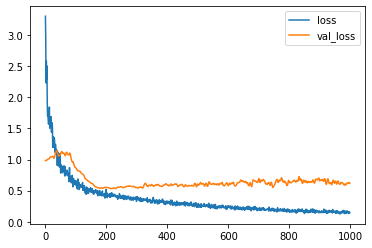

In [9]:
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

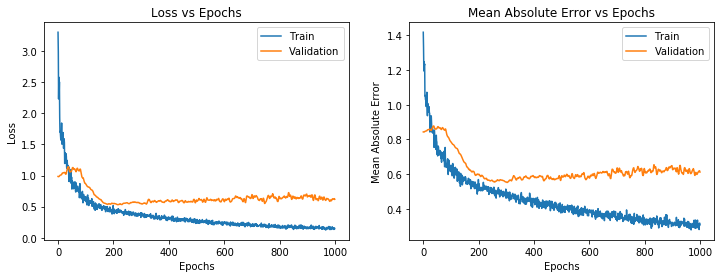

In [10]:
import pandas as pd
import numpy as np


frame = pd.DataFrame(history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()


In [11]:
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 67,585
Trainable params: 67,585
Non-trainable params: 0
__________________________________________________

In [12]:
model_2.compile(optimizer='adam', loss='mse', metrics='mae')

In [13]:
model_2.fit(train_data, train_targets, validation_split=0.15,batch_size=128, epochs=1000, verbose=False)

In [14]:
history = model_2.history.history

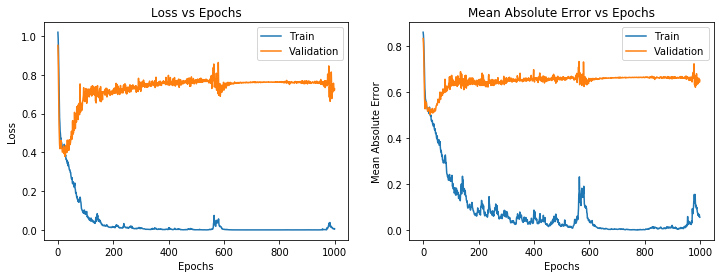

In [15]:
frame = pd.DataFrame(history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

In [16]:
model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

In [17]:
model_3.compile(optimizer='adam', loss='mse', metrics='mae')

In [18]:
model_3.fit(train_data, train_targets, validation_split=0.15,batch_size=128, epochs=1000, verbose=False)

In [19]:
history = model_3.history.history

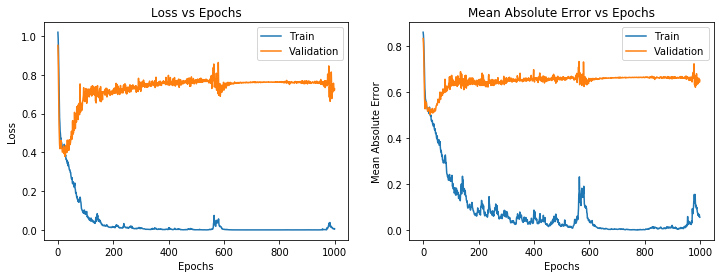

In [20]:
fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

In [21]:
model.evaluate(test_data, test_targets)

3/3 [==============================] - 0s 0s/step - loss: 0.9252 - mae: 0.7331


[0.9252141118049622, 0.7330684065818787]

In [22]:
model_2.evaluate(test_data, test_targets)

3/3 [==============================] - 0s 8ms/step - loss: 0.9422 - mae: 0.7468


[0.9421743154525757, 0.7468361258506775]

In [23]:
model_3.evaluate(test_data, test_targets)

3/3 [==============================] - 0s 2ms/step - loss: 0.9438 - mae: 0.7649


[0.9438061714172363, 0.7649234533309937]